# Spider-Gender

## Fasi:
1. Estrazione dei dataset
2. Combinazione dei dataset

# Estrazione dei dataset
In questa fase vengono create le directory contenenti i dataset estratti.  
É necessario che nella cartella contenente i file si trovino i **.zip** dei 2 dataset.

In [69]:
#Inserire in una cartella di lavoro i file zip dei dataset
#Creazione delle directory ed estrazione dei dataset
import os
import utils as u

path=r"C:\Users\vince\Desktop\Progetto FVAB"
os.chdir(path)
cwd = os.getcwd()

#Crea directory per estrarre i dataset solo una volta all'inizio
u.makedir('celeba')
u.makedir('utkface')

#Estrae i due dataset solo una volta all'inizio
u.unzip('celeba-dataset.zip','celeba')
u.unzip('utkface-new.zip','utkface')

# Combinazione dei dataset
In questa fase sono combinati i due dataset e viene creato un indice che tiene traccia dei nuovi nomi 

| Old_Name    | New_Name   |
| :---: | :---: |
|   000001.jpg    | 000001_1.jpg     |
|  1_0_0_20161219140627985.jpg.chip.jpg  | 000002_0.jpg       |

Il nuovo nome è composto da:
* Parte sinistra un intero che incrementa di 1
* Parte destra dopo l'underscore che indica la label 
 0. Donna 
 1. Uomo

In [73]:
import utils as u
import os
path=r"C:\Users\vince\Desktop\Progetto FVAB"
os.chdir(path)

u.makedir('merged_dataset')
os.chdir('merged_dataset')
u.makedir('images')


path_images_celeba=r"C:\Users\vince\Desktop\Progetto FVAB\celeba\img_align_celeba\img_align_celeba"
path_images_celeba2=r"C:\Users\vince\Desktop\Progetto FVAB\celeba\img_align_celeba\img_align_celeba2"

path_images_utkface=r"C:\Users\vince\Desktop\Progetto FVAB\utkface\UTKFace"
path_images_utkface2=r"C:\Users\vince\Desktop\Progetto FVAB\\utkface\UTKFace2"

path_celeba_csv=r"C:\Users\vince\Desktop\Progetto FVAB\celeba\list_attr_celeba.csv"
path_celeba_csv2=r"C:\Users\vince\Desktop\Progetto FVAB\celeba\list_attr_celeba2.csv"

dest_path=r"C:\Users\vince\Desktop\Progetto FVAB\merged_dataset\images"
dest_path_oldnew_csv=r"C:\Users\vince\Desktop\Progetto FVAB\merged_dataset"

u.merge_datasets(path_images_celeba,
                 path_images_utkface,
                 path_celeba_csv,
                 dest_path,
                 dest_path_oldnew_csv)
#u.merge_utk_only(path_images_utkface2,dest_path_oldnew_csv,dest_path)

# Estrazione dei Landmarks
In questa fase utilizzo l'algoritmo fornito per ottenere i landmarks sul volto  

<img style="float:left;" src="web.PNG">

In [74]:
%%capture
os.chdir(path)
import calcolo_ragnatela as spider
spider.extract_landmarks_4circles_4sectors(r"C:\Users\vince\Desktop\Progetto FVAB\shape_predictor_68_face_landmarks.dat",r'C:\Users\vince\Desktop\Progetto FVAB\merged_dataset\images')

# Classificatore
Usiamo le SVM  
Seed 42


In [2]:
#Import svm model
from sklearn import svm
from sklearn import metrics
from numpy import loadtxt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
from numpy import savetxt


#Provare con 1000 immagini e cronometrare

import pandas as pd
from sklearn.model_selection import train_test_split

labels= loadtxt('UTK_Matrix.csv',delimiter=',', usecols=(0,))
data= loadtxt('UTK_Matrix.csv', delimiter=',',usecols=range(1,64))

print(data.shape)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=False, random_state=42)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#dump(svclassifier, 'SVM_CelebA.joblib') 


y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['female','male']))

print(mean_absolute_error(y_test, y_pred))

savetxt('y_test_UTK.csv',y_test,fmt='%i',delimiter=',')
savetxt('y_pred_UTK.csv',y_pred,fmt='%i',delimiter=',')

#Senza stratificazione

(23707, 63)
[[1565 1198]
 [1155 3195]]
              precision    recall  f1-score   support

      female       0.58      0.57      0.57      2763
       ma le       0.73      0.73      0.73      4350

    accuracy                           0.67      7113
   macro avg       0.65      0.65      0.65      7113
weighted avg       0.67      0.67      0.67      7113

0.33080275551806554


In [1]:
import utils as u

#CelebA
#u.extract_male('CelebA_Matrix.csv','CelebA_Male.csv')
#u.extract_female('CelebA_Matrix.csv','CelebA_Female.csv')
u.balance_datasets_random_50_50('CelebA_Male.csv','CelebA_Female.csv','a.csv')

#UTK
#u.extract_male('UTK_Matrix.csv','UTK_Male.csv')
#u.extract_female('UTK_Matrix.csv','UTK_Female.csv')
#u.balance_datasets_random_50_50('UTK_Male.csv','UTK_Female.csv','b.csv')

#UTK+CelebA
#u.extract_male('CelebA+UTK_Matrix.csv','CelebA+UTK_Male.csv')
#u.extract_female('CelebA+UTK_Matrix.csv','CelebA+UTK_Female.csv')
#u.balance_datasets_random_50_50('UTK+CelebA_Male.csv','UTK+CelebA_Female.csv','c.csv')

more females
30672
(171926, 65)


In [15]:
#Import svm model
from sklearn import svm
from sklearn import metrics
from numpy import loadtxt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
from numpy import savetxt
import numpy as np
import pandas as pd





import pandas as pd
from sklearn.model_selection import train_test_split 

labels= loadtxt('UTK_Even_Gender.csv',delimiter=',', usecols=(0,))
data= loadtxt('UTK_Even_Gender.csv', delimiter=',',usecols=range(1,64))

print(data.shape)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True,stratify=labels, random_state=42)

#Numero di uni nelle label del test set (e zeri in basso)
print(np.count_nonzero(y_test == 1)) 
print(np.count_nonzero(y_test == 0))

#Numero di uni nelle label del training set (e zeri in basso)
print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 0))


svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

dump(svclassifier, 'SVM_UTK_Balanced_42.joblib') 


y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['female','male']))

print(mean_absolute_error(y_test, y_pred))

savetxt('y_test_UTK_Balanced_42.csv',y_test,fmt='%i',delimiter=',')
savetxt('y_pred_UTK_Balanced_42.csv',y_pred,fmt='%i',delimiter=',')  
   
#Con stratificazione




(22806, 63)
3421
3421
7982
7982
[[2385 1036]
 [1113 2308]]
              precision    recall  f1-score   support

      female       0.68      0.70      0.69      3421
        male       0.69      0.67      0.68      3421

    accuracy                           0.69      6842
   macro avg       0.69      0.69      0.69      6842
weighted avg       0.69      0.69      0.69      6842

0.314089447529962


# Esperimento 2
1. Utilizzare classificatore addestrato su **CelebA** con test set **UTKFace** intero <br/><br/>

2. Utilizzare classificatore addestrato su **CelebA** con test set **UTKFace** utilizzato in precedenza<br/><br/>

3. Utilizzare classificatore addestrato su **UTKFace** con test set **CelebA** intero  <br/><br/>

4. Utilizzare classificatore addestrato su **UTKFace** con test set **CelebA** utilizzato in precedenza <br/><br/>


In [1]:
from sklearn import svm
from sklearn import metrics
from numpy import loadtxt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
from numpy import savetxt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

loaded_model = load('SVM_UTK_Balanced_42.joblib')


labels= loadtxt('CelebA_Even_Gender.csv',delimiter=',', usecols=(0,))
data= loadtxt('CelebA_Even_Gender.csv', delimiter=',',usecols=range(1,64))

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True,stratify=labels, random_state=42)



y_pred = loaded_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['female','male']))

print(mean_absolute_error(y_test, y_pred))

savetxt('y_test_2nd_experiment_4UTK-CelebA42.csv',y_test,fmt='%i',delimiter=',')
savetxt('y_pred_2nd_experiment_4UTK-CelebA42.csv',y_pred,fmt='%i',delimiter=',')  

[[17111  8678]
 [ 7773 18016]]
              precision    recall  f1-score   support

      female       0.69      0.66      0.68     25789
        male       0.67      0.70      0.69     25789

    accuracy                           0.68     51578
   macro avg       0.68      0.68      0.68     51578
weighted avg       0.68      0.68      0.68     51578

0.3189538175190973


# Integrazione
Utilizziamo una rete neurale e ripetiamo i 2 esperimenti

## Primo esperimento (buono)



## Secondo Esperimento

Train on 109439 samples, validate on 27360 samples
Epoch 1/80
109248/109439 [============================>.] - ETA: 0s - loss: 0.5275 - accuracy: 0.7352 - mae: 0.3559
Epoch 00001: val_mae improved from inf to 0.33446, saving model to ./CelebA+UTK_weights-update-01-0.33.hdf5
109439/109439 [==============================] - 21s 192us/sample - loss: 0.5274 - accuracy: 0.7352 - mae: 0.3558 - val_loss: 0.5037 - val_accuracy: 0.7522 - val_mae: 0.3345
Epoch 2/80
109376/109439 [============================>.] - ETA: 0s - loss: 0.4911 - accuracy: 0.7623 - mae: 0.3253
Epoch 00002: val_mae improved from 0.33446 to 0.32255, saving model to ./CelebA+UTK_weights-update-02-0.32.hdf5
109439/109439 [==============================] - 24s 221us/sample - loss: 0.4912 - accuracy: 0.7623 - mae: 0.3253 - val_loss: 0.4884 - val_accuracy: 0.7647 - val_mae: 0.3225
Epoch 3/80
109344/109439 [============================>.] - ETA: 0s - loss: 0.4785 - accuracy: 0.7703 - mae: 0.3157
Epoch 00003: val_mae improved fro

Epoch 23/80
109344/109439 [============================>.] - ETA: 0s - loss: 0.3501 - accuracy: 0.8461 - mae: 0.2310
Epoch 00023: val_mae did not improve from 0.27488
109439/109439 [==============================] - 24s 219us/sample - loss: 0.3502 - accuracy: 0.8461 - mae: 0.2310 - val_loss: 0.4759 - val_accuracy: 0.7833 - val_mae: 0.2752
Epoch 24/80
109280/109439 [============================>.] - ETA: 0s - loss: 0.3446 - accuracy: 0.8489 - mae: 0.2275
Epoch 00024: val_mae improved from 0.27488 to 0.27223, saving model to ./CelebA+UTK_weights-update-24-0.27.hdf5
109439/109439 [==============================] - 24s 217us/sample - loss: 0.3447 - accuracy: 0.8488 - mae: 0.2275 - val_loss: 0.4788 - val_accuracy: 0.7816 - val_mae: 0.2722
Epoch 25/80
109248/109439 [============================>.] - ETA: 0s - loss: 0.3372 - accuracy: 0.8539 - mae: 0.2229
Epoch 00025: val_mae improved from 0.27223 to 0.27179, saving model to ./CelebA+UTK_weights-update-25-0.27.hdf5
109439/109439 [============

Epoch 46/80
109344/109439 [============================>.] - ETA: 0s - loss: 0.1884 - accuracy: 0.9293 - mae: 0.1328
Epoch 00046: val_mae improved from 0.25754 to 0.25628, saving model to ./CelebA+UTK_weights-update-46-0.26.hdf5
109439/109439 [==============================] - 24s 215us/sample - loss: 0.1883 - accuracy: 0.9293 - mae: 0.1328 - val_loss: 0.5978 - val_accuracy: 0.7742 - val_mae: 0.2563
Epoch 47/80
109216/109439 [============================>.] - ETA: 0s - loss: 0.1826 - accuracy: 0.9318 - mae: 0.1289
Epoch 00047: val_mae did not improve from 0.25628
109439/109439 [==============================] - 24s 216us/sample - loss: 0.1826 - accuracy: 0.9318 - mae: 0.1289 - val_loss: 0.6258 - val_accuracy: 0.7693 - val_mae: 0.2571
Epoch 48/80
109344/109439 [============================>.] - ETA: 0s - loss: 0.1767 - accuracy: 0.9353 - mae: 0.1253
Epoch 00048: val_mae improved from 0.25628 to 0.25203, saving model to ./CelebA+UTK_weights-update-48-0.25.hdf5
109439/109439 [============

Epoch 69/80
109248/109439 [============================>.] - ETA: 0s - loss: 0.0742 - accuracy: 0.9793 - mae: 0.0575
Epoch 00069: val_mae did not improve from 0.24392
109439/109439 [==============================] - 24s 216us/sample - loss: 0.0743 - accuracy: 0.9792 - mae: 0.0575 - val_loss: 0.8461 - val_accuracy: 0.7647 - val_mae: 0.2504
Epoch 70/80
109312/109439 [============================>.] - ETA: 0s - loss: 0.0715 - accuracy: 0.9800 - mae: 0.0554
Epoch 00070: val_mae did not improve from 0.24392
109439/109439 [==============================] - 23s 213us/sample - loss: 0.0715 - accuracy: 0.9800 - mae: 0.0553 - val_loss: 0.8290 - val_accuracy: 0.7664 - val_mae: 0.2490
Epoch 71/80
109344/109439 [============================>.] - ETA: 0s - loss: 0.0670 - accuracy: 0.9824 - mae: 0.0526
Epoch 00071: val_mae did not improve from 0.24392
109439/109439 [==============================] - 24s 219us/sample - loss: 0.0670 - accuracy: 0.9824 - mae: 0.0526 - val_loss: 0.8648 - val_accuracy: 0.

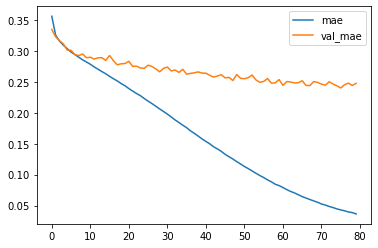

[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]
[[21344  7971]
 [ 6004 23310]]
              precision    recall  f1-score   support

      female       0.78      0.73      0.75     29315
        male       0.75      0.80      0.77     29314

    accuracy                           0.76     58629
   macro avg       0.76      0.76      0.76     58629
weighted avg       0.76      0.76      0.76     58629

0.23836326732504393


In [58]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
from sklearn import metrics
from numpy import loadtxt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
from numpy import savetxt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


filepath="./CelebA+UTK_weights-update-{epoch:02d}-{val_mae:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]


name='UTK+CelebA_Even_Gender'

labels= loadtxt(name+'.csv',delimiter=',', usecols=(0,))
data= loadtxt(name+'.csv', delimiter=',',usecols=range(1,64))

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True,stratify=labels, random_state=42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(63,)))
model.add(tf.keras.layers.Dense(768, activation='relu'))
model.add(tf.keras.layers.Dense(768, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer = opt,
         loss = 'binary_crossentropy',
         metrics = ['accuracy','mae'])
history=model.fit(X_train, y_train, epochs=80,
                  verbose=1, callbacks=callbacks_list , validation_split=0.2)


pyplot.plot(history.history['mae'], label='mae')
pyplot.plot(history.history['val_mae'], label='val_mae')
pyplot.legend()
plt.savefig(name+'_Plot.png')
pyplot.show()



y_pred=model.predict_classes(X_test)
print(y_pred)
savetxt('Neural_network_'+name+' Predictions',y_test,fmt='%i',delimiter=',')


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['female','male']))

print(mean_absolute_error(y_test, y_pred))




